In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.applications import InceptionV3

Using TensorFlow backend.


In [3]:
pre_trained_model = InceptionV3(input_shape=(150,150,3),include_top= False)

In [4]:
for layer in pre_trained_model.layers:
    layer.trainable=False

In [5]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [6]:
train = pd.read_csv('train.csv')

In [7]:
test = pd.read_csv('test.csv')

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_y = train.label
#train_y = np_utils.to_categorical(train_y)
train_y.shape

(42000,)

In [10]:
train_X = train.iloc[:,1:]
train_X.shape

(42000, 784)

In [11]:
# Take all the value for reshaping -1, dimension (28,28), colour 1
train_X = train_X.values.reshape(-1,28,28)
test_X = test.values.reshape(-1,28,28)
train_X.shape

(42000, 28, 28)

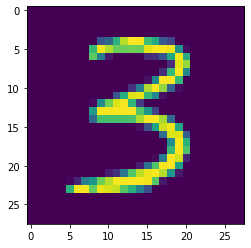

In [12]:
plt.imshow(train_X[9])
plt.imshow(test_X[9])

In [14]:
train_X = train_X.repeat(3, -1)  
test_X = test_X.repeat(3, -1)# repeat the last (-1) dimension three timesR
RGB_train_X = tf.convert_to_tensor(train_X)
RGB_test_X = tf.convert_to_tensor(test_X)

MemoryError: Unable to allocate 754. MiB for an array with shape (42000, 28, 84) and data type int64